# Naive Bayes Classifier and Softmax Regressor Implementation and Comparison

In [2]:
# Import necessary libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
import kagglehub

## Loading, Defining and Understanding the data

In [3]:
# Download latest version
path = kagglehub.dataset_download("ruchikakumbhar/obesity-prediction")
df = pd.read_csv(f'{path}/Obesity prediction.csv')

100%|██████████| 57.5k/57.5k [00:00<00:00, 1.71MB/s]

Extracting files...


In [4]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
df['Obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [13]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Visualization part

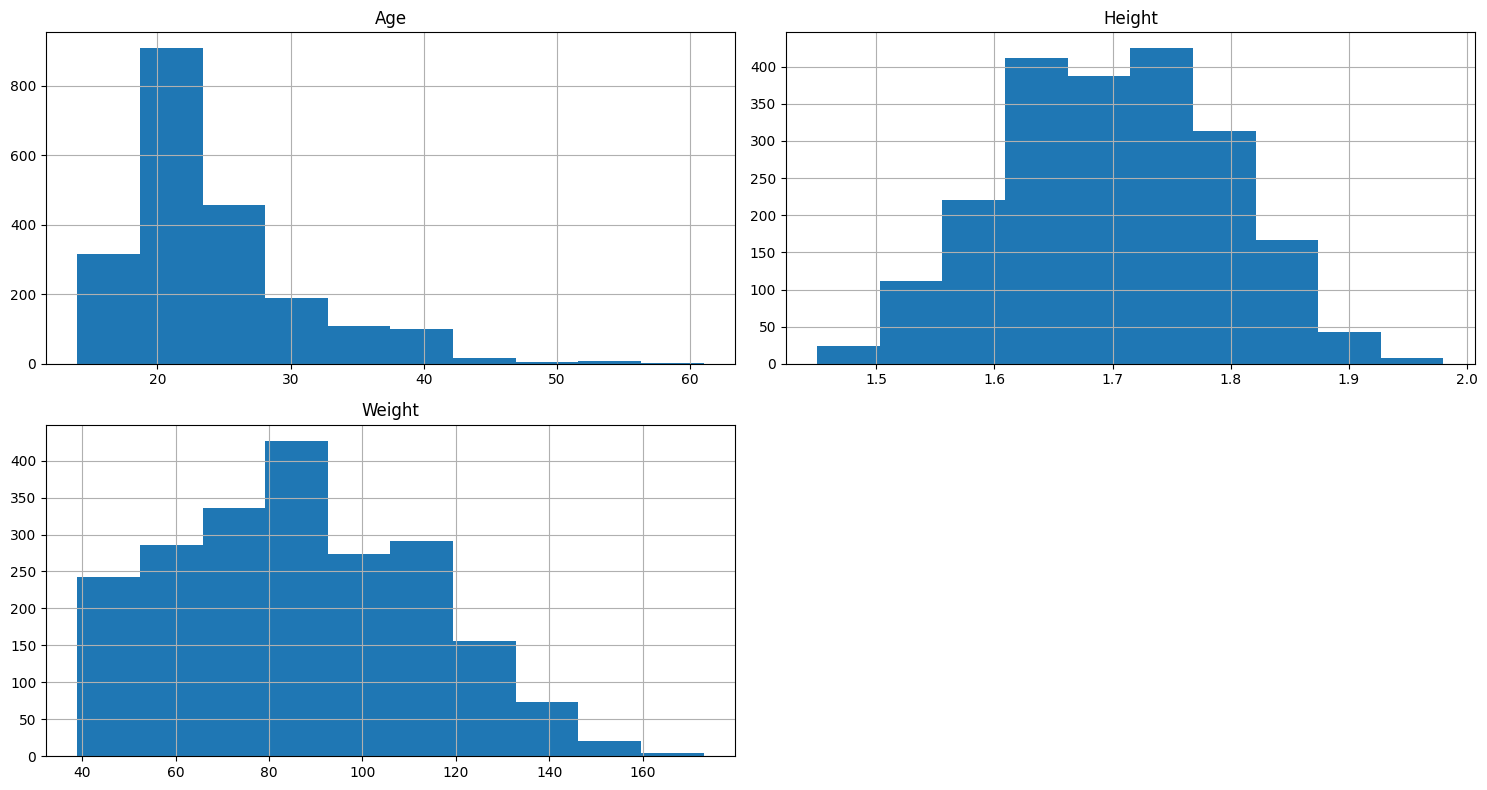

In [22]:
# Histogram
df.hist(figsize=(15,8), column=['Age', 'Height', 'Weight'])
plt.tight_layout()
plt.show()


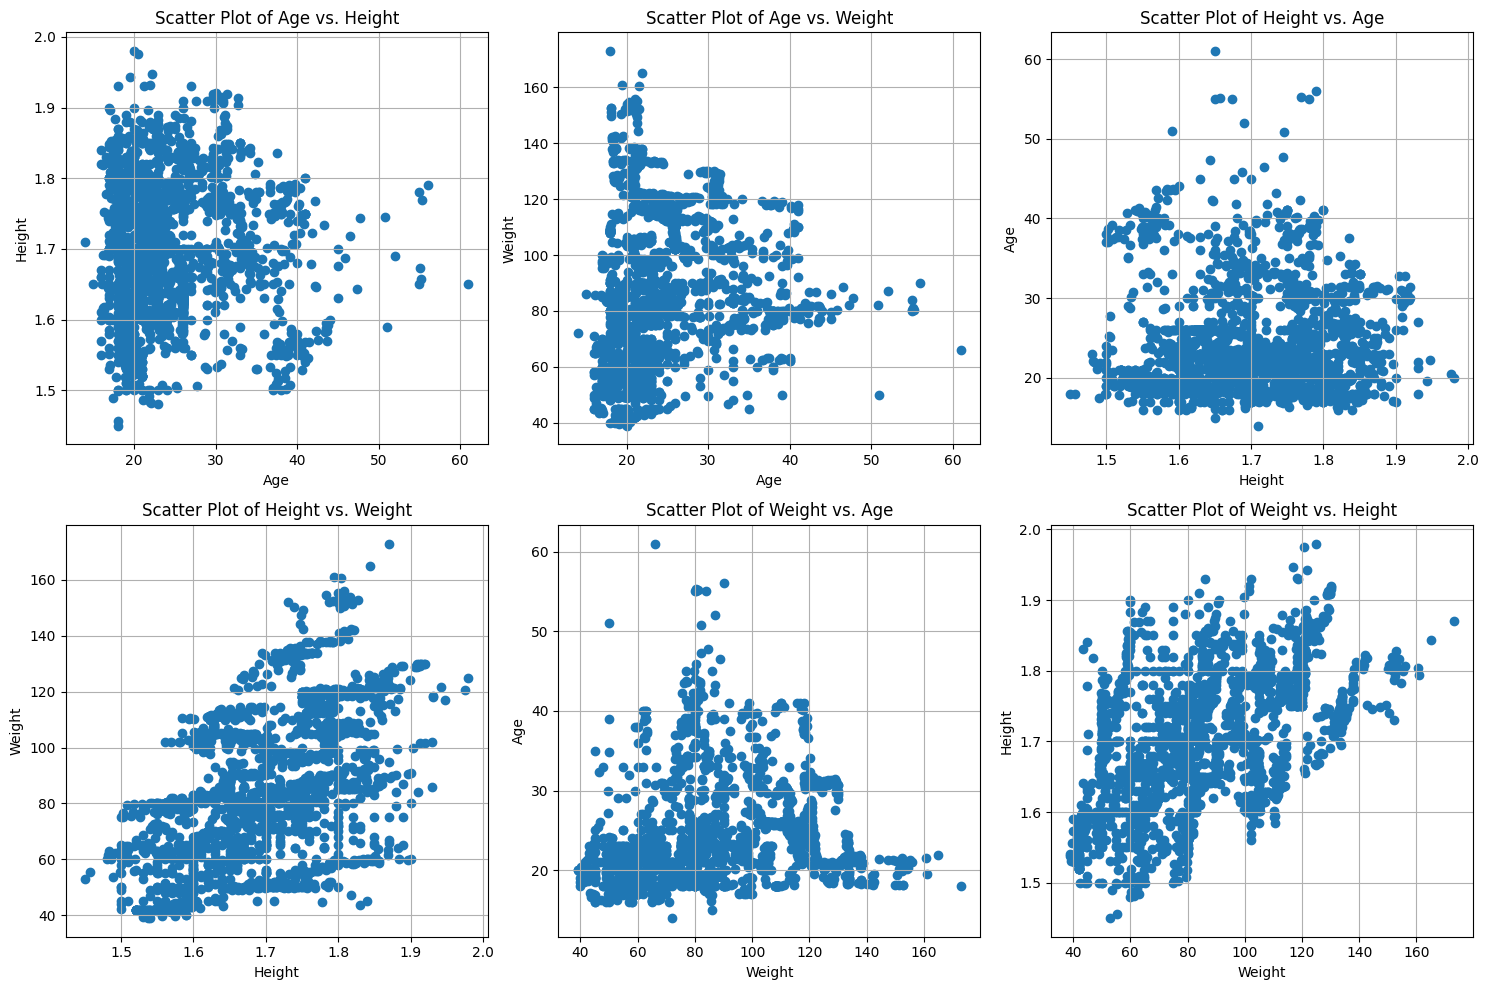

In [25]:
# Scatter plots
columns_to_plot = ['Age', 'Height', 'Weight']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

index = 0
for col1 in columns_to_plot:
    for col2 in columns_to_plot:
        if col1 != col2 and index < len(axes):
            axes[index].scatter(df[col1], df[col2])
            axes[index].set_xlabel(col1)
            axes[index].set_ylabel(col2)
            axes[index].set_title(f'Scatter Plot of {col1} vs. {col2}')
            axes[index].grid(True)
            index += 1

for i in range(index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Preprocessing

In [26]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [27]:
X = df.drop('Obesity', axis=1)
y = df['Obesity']

In [42]:
X.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation
1,1,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation
2,0,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation
3,0,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking
4,0,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation


In [29]:
# Label Encoding to target feature
le = LabelEncoder()
y = le.fit_transform(y)


In [34]:
# Gender mapper
gender_mapper = {'Male': 0, 'Female': 1}
X['Gender'] = X['Gender'].map(gender_mapper)

In [35]:
# Family history mapper
family_history_mapper = {'yes': 1, 'no': 0}
X['family_history'] = X['family_history'].map(family_history_mapper)

In [37]:
# FAVC mapper
fAVC_mapper = {'yes': 1, 'no': 0}
X['FAVC'] = X['FAVC'].map(fAVC_mapper)

In [38]:
# SMOKE mapper
SMOKE_mapper = {'yes': 1, 'no': 0}
X['SMOKE'] = X['SMOKE'].map(SMOKE_mapper)

In [40]:
# SCC mapper
SCC_mapper = {'yes': 1, 'no': 0}
X['SCC'] = X['SCC'].map(SCC_mapper)

In [43]:
# Splitting to num and cat features
num_features = ['Age', 'Height', 'Weight']
cat_features = ['CAEC', 'CALC', 'MTRANS']

### Pipeline

In [45]:
# Preparing to transform
num_trans = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

cat_trans = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [46]:
# Tranforming data
preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, num_features),
    ('cat', cat_trans, cat_features)
])

In [47]:
# Creating full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

## Training and Evaluating

### Training

In [61]:
# Splitting data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Training with train data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['CAEC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier', GaussianNB())])

In [63]:
# Predicting with test data
y_pred = pipeline.predict(X_test)

### Evaluating

In [64]:
# Accuracy
accuracy_gaussian = accuracy_score(y_test, y_pred)
accuracy_gaussian

0.3911671924290221

In [56]:
# Classification report
class_gaussian = classification_report(y_test, y_pred)
print(class_gaussian)

              precision    recall  f1-score   support

           0       0.41      0.65      0.50        86
           1       0.50      0.03      0.06        93
           2       0.43      0.53      0.47       102
           3       0.61      0.26      0.37        88
           4       0.34      0.99      0.51        98
           5       0.42      0.11      0.18        88
           6       0.26      0.06      0.10        79

    accuracy                           0.39       634
   macro avg       0.42      0.38      0.31       634
weighted avg       0.43      0.39      0.32       634



## MultinomialNB

In [65]:
# Creating full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

In [66]:
# Splitting data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# Training with train data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['CAEC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier', MultinomialNB())])

In [68]:
# Predicting with test data
y_pred = pipeline.predict(X_test)

In [69]:
# Accuracy
accuracy_multinomial = accuracy_score(y_test, y_pred)
accuracy_multinomial

0.35173501577287064

In [70]:
# Classification report
class_multinomial = classification_report(y_test, y_pred)
print(class_multinomial)

              precision    recall  f1-score   support

           0       0.58      0.45      0.51        86
           1       0.55      0.12      0.19        93
           2       0.30      0.42      0.35       102
           3       0.46      0.22      0.29        88
           4       0.30      0.99      0.46        98
           5       0.48      0.11      0.18        88
           6       0.24      0.05      0.08        79

    accuracy                           0.35       634
   macro avg       0.42      0.34      0.30       634
weighted avg       0.41      0.35      0.30       634



## Softmax Regression classifier

In [71]:
# Defining the model
softmax_regression = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)

In [73]:
# Defining pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', softmax_regression)
])

In [76]:
# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Train and Predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [78]:
# Accuracy
accuracy_softmax = accuracy_score(y_test, y_pred)
accuracy_softmax

0.624113475177305

In [79]:
# Classification report
class_softmax = classification_report(y_test, y_pred)
print(class_softmax)


              precision    recall  f1-score   support

           0       0.67      0.98      0.80        56
           1       0.52      0.19      0.28        62
           2       0.60      0.58      0.59        78
           3       0.67      0.67      0.67        58
           4       0.75      1.00      0.86        63
           5       0.51      0.73      0.60        56
           6       0.43      0.18      0.25        50

    accuracy                           0.62       423
   macro avg       0.59      0.62      0.58       423
weighted avg       0.60      0.62      0.59       423



## Comparison of three models

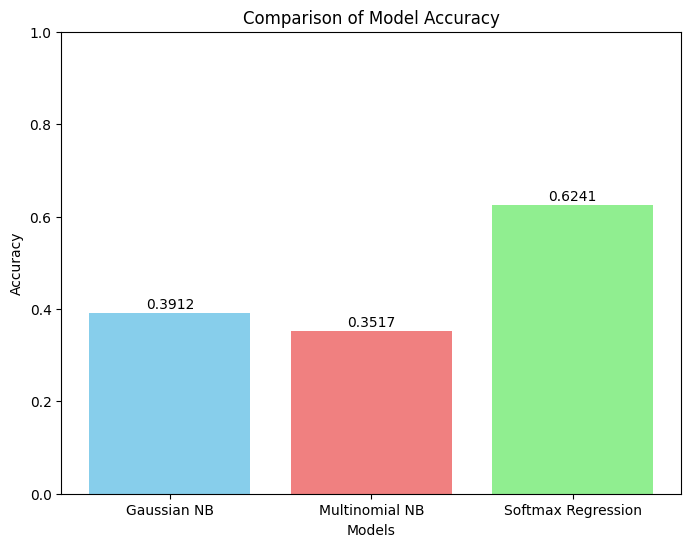

In [81]:

models = ['Gaussian NB', 'Multinomial NB', 'Softmax Regression']
accuracy_scores = [accuracy_gaussian, accuracy_multinomial, accuracy_softmax]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')


plt.ylim(0, 1.0)
plt.show()
